In [64]:
import pandas as pd
import numpy as np

from math import radians, cos, sin, asin, sqrt
from matplotlib import pyplot as plt

# AIRE
**Estaciones del aire**

Cargar el dataset con los datos de las estaciones de la medición.

http://opendata-ajuntament.barcelona.cat/data/es/dataset/qualitat-aire-estacions-bcn


In [65]:
estaciones = pd.read_csv('qualitat_aire_estacions_bcn.csv')
estaciones

,nom_cabina,codi_dtes,zqa,codi_eoi,longitud,latitud,Ubicacio,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Ocupacio_sol,Emissions_Properes,Contaminant_1,Contaminant_2,Contaminant_3
0,Barcelona - Ciutadella,IL,1,8019050,2.1874,41.3864,Parc de la Ciutadella,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Urbana,Fons,NO2,O3,NaN
1,Barcelona - Eixample,IH,1,8019043,2.1538,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,NO2,O3,PM10
2,Barcelona - Gràcia,IJ,1,8019044,2.1534,41.3987,Plaça Gal·la Placídia (Via Augusta - Travesser...,6,Gracia,31,la Vila de Gracia,Urbana,Trànsit,NO2,O3,PM10
3,Barcelona - Palau Reial,IZ,1,8019057,2.1151,41.3875,c/ John Maynard Keynes - c/ de Jordi Girona,4,Les Corts,21,Pedralbes,Urbana,Fons,NO2,O3,PM10
4,Barcelona - Poblenou,I2,1,8019004,2.2045,41.4039,Plaça Josep Trueta (Pujades - Lope de Vega),10,Sant Marti,68,el Poblenou,Urbana,Fons,NO2,NaN,PM10
5,Barcelona - Sants,ID,1,8019042,2.1331,41.3788,Jardins de Can Mantega (Joan Güell - Violant d...,3,Sants-Montjuic,18,Sants,Urbana,Fons,NO2,NaN,NaN
6,Barcelona - Vall Hebron,IN,1,8019054,2.1480,41.4261,Parc de la Vall d’Hebron - c/ Martí Codolar - ...,7,Horta-Guinardo,41,la Vall d'Hebron,Urbana,Fons,NO2,O3,PM10


**Calidad del aire**

Cargar los datos de calidades de aire medidos en todas las estaciones.

http://opendata-ajuntament.barcelona.cat/data/es/dataset/qualitat-aire-detall-bcn

In [66]:
calidad = pd.read_csv('2018_11_novembre_qualitat_aire_bcn.csv')
calidad['generat'] = pd.to_datetime(calidad['generat'], format='%d/%m/%Y %H:%M')
calidad.head()

,nom_cabina,qualitat_aire,codi_dtes,zqa,codi_eoi,longitud,latitud,hora_o3,qualitat_o3,valor_o3,hora_no2,qualitat_no2,valor_no2,hora_pm10,qualitat_pm10,valor_pm10,generat,dateTime
0,Barcelona - Sants,Bona,ID,1,8019042,2.1331,41.3788,NaN,NaN,NaN,0h,Bona,84 µg/m³,NaN,NaN,NaN,2018-11-01,1541027104
1,Barcelona - Eixample,Regular,IH,1,8019043,2.1538,41.3853,0h,Bona,1 µg/m³,0h,Regular,113 µg/m³,0h,Bona,36 µg/m³,2018-11-01,1541027104
2,Barcelona - Gràcia,Bona,IJ,1,8019044,2.1534,41.3987,0h,Bona,10 µg/m³,0h,Bona,73 µg/m³,NaN,NaN,NaN,2018-11-01,1541027104
3,Barcelona - Ciutadella,Bona,IL,1,8019050,2.1874,41.3864,0h,Bona,2 µg/m³,0h,Bona,86 µg/m³,NaN,NaN,NaN,2018-11-01,1541027104
4,Barcelona - Vall Hebron,Bona,IN,1,8019054,2.1480,41.4261,0h,Bona,7 µg/m³,0h,Bona,69 µg/m³,NaN,NaN,NaN,2018-11-01,1541027104


Mapear los strings de `qualitat_aire` (*Bona, Regular, Pobra*) a valores int.

In [67]:
def quality_to_number(quality):
    val = 0
    if quality == "Regular":
        val = 1
    elif quality == "Pobre":
        val = 2
    return val

In [68]:
calidad['qualitat_aire'] = calidad.apply(lambda row: quality_to_number(row[1]), axis=1)

In [69]:
calidad.head()

,nom_cabina,qualitat_aire,codi_dtes,zqa,codi_eoi,longitud,latitud,hora_o3,qualitat_o3,valor_o3,hora_no2,qualitat_no2,valor_no2,hora_pm10,qualitat_pm10,valor_pm10,generat,dateTime
0,Barcelona - Sants,0,ID,1,8019042,2.1331,41.3788,NaN,NaN,NaN,0h,Bona,84 µg/m³,NaN,NaN,NaN,2018-11-01,1541027104
1,Barcelona - Eixample,1,IH,1,8019043,2.1538,41.3853,0h,Bona,1 µg/m³,0h,Regular,113 µg/m³,0h,Bona,36 µg/m³,2018-11-01,1541027104
2,Barcelona - Gràcia,0,IJ,1,8019044,2.1534,41.3987,0h,Bona,10 µg/m³,0h,Bona,73 µg/m³,NaN,NaN,NaN,2018-11-01,1541027104
3,Barcelona - Ciutadella,0,IL,1,8019050,2.1874,41.3864,0h,Bona,2 µg/m³,0h,Bona,86 µg/m³,NaN,NaN,NaN,2018-11-01,1541027104
4,Barcelona - Vall Hebron,0,IN,1,8019054,2.1480,41.4261,0h,Bona,7 µg/m³,0h,Bona,69 µg/m³,NaN,NaN,NaN,2018-11-01,1541027104


Calculamos la calidad de aire media por hora y por estación

In [70]:
calidad.groupby([calidad["codi_eoi"], calidad["generat"].dt.day, calidad["generat"].dt.hour])["qualitat_aire"].mean()

codi_eoi  generat  generat
8019004   1        0          0
                   1          0
                   2          0
                   3          0
                   4          0
                   5          0
                   6          0
                   7          0
                   8          0
                   9          0
                   10         0
                   11         0
                   12         0
                   13         0
                   14         0
                   15         0
                   16         0
                   17         0
                   18         0
                   19         0
                   20         0
                   21         0
                   22         0
                   23         0
          2        0          0
                   1          0
                   2          0
                   3          0
                   4          0
                   5          0
             

**Trafico**

Cargar los datos de trafico de cada tramo de la ciudad de Barcelona.

http://opendata-ajuntament.barcelona.cat/data/es/dataset/trams



In [71]:
trafico = pd.read_csv('2018_11_Novembre_TRAMS_TRAMS.csv')
trafico['data'] = trafico['data'].astype(str)
trafico['data'] = pd.to_datetime(trafico['data'], format='%Y%m%d%H%M%S')
trafico.head()

,idTram,data,estatActual,estatPrevist
0,1,2018-11-01 00:00:53,0,0
1,2,2018-11-01 00:00:53,0,0
2,3,2018-11-01 00:00:53,0,0
3,4,2018-11-01 00:00:53,0,0
4,5,2018-11-01 00:00:53,0,0


In [72]:
trafico.groupby([trafico['idTram'], trafico['data'].dt.day, trafico['data'].dt.hour])['estatActual'].mean()

idTram  data  data
1       1     0       0.000000
              1       0.000000
              2       0.000000
              3       0.000000
              4       0.000000
              5       0.000000
              6       0.666667
              7       1.000000
              8       1.000000
              9       1.000000
              10      1.500000
              11      2.000000
              12      2.000000
              13      2.000000
              14      2.000000
              15      1.000000
              16      2.000000
              17      2.000000
              18      2.000000
              19      2.000000
              20      2.000000
              21      1.500000
              22      1.000000
              23      1.000000
        2     0       0.000000
              1       0.000000
              2       0.000000
              3       0.000000
              4       0.000000
              5       0.000000
                        ...   
2003    29    18    

**Tramos**

Datos de los tramos (calles) de Barcelona

http://opendata-ajuntament.barcelona.cat/data/ca/dataset/transit-relacio-trams/resource/036bfde0-b73e-4cb9-93db-5785f032ab68


In [73]:
tramos = pd.read_excel('transit_relacio_trams.xlsx')
tramos = tramos.dropna()

In [74]:
tramos.head()

,Tram,Descripció,Coordenades
0,1,Diagonal (Ronda de Dalt a Doctor Marañón),"2.11203535639414,41.3841912394771,0 2.10150286..."
1,2,Diagonal (Doctor Marañón a Ronda de Dalt),"2.111944376806616,41.38446666680338,0 2.101594..."
2,3,Diagonal (Doctor Marañón a Pl. Pius XII),"2.112093343037027,41.38422850920645,0 2.122649..."
3,4,Diagonal (Pl. Pius XII a Doctor Marañón),"2.122592049318304,41.38719094189204,0 2.111969..."
4,5,Diagonal (Pl. Pius XII a Pl. Maria Cristina),"2.122657659295115,41.38694195794678,0 2.127559..."


Calcular las coordenadas del punto medio en cada calle

In [75]:
def get_mean_point(coords):
    crs = [float(i) for i in coords.replace("0","").replace(" ","").split(",")[:4]]
    return ((crs[1] + crs[3])/2, (crs[0] + crs[2]) / 2)
    

In [76]:
tramos["PuntoMedio"] = tramos.apply(lambda row: get_mean_point(row[2]), axis=1)

In [77]:
tramos.head()

,Tram,Descripció,Coordenades,PuntoMedio
0,1,Diagonal (Ronda de Dalt a Doctor Marañón),"2.11203535639414,41.3841912394771,0 2.10150286...","(41.38291458034955, 2.1138199260462)"
1,2,Diagonal (Doctor Marañón a Ronda de Dalt),"2.111944376806616,41.38446666680338,0 2.101594...","(41.3831672979734, 2.11394666062783)"
2,3,Diagonal (Doctor Marañón a Pl. Pius XII),"2.112093343037027,41.38422850920645,0 2.122649...","(41.385579136151, 2.1177916139465838)"
3,4,Diagonal (Pl. Pius XII a Doctor Marañón),"2.122592049318304,41.38719094189204,0 2.111969...","(41.385828423750894, 2.117280854533155)"
4,5,Diagonal (Pl. Pius XII a Pl. Maria Cristina),"2.122657659295115,41.38694195794678,0 2.127559...","(41.38756093575339, 2.1251086358272966)"


Añadir a cada tramo su estacion asignada

In [78]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [79]:
def extract_coords_tramos(df):
    """
    Retorna los id,coordenadas de cada punto medio de cada tramo
    """
    points = []
    for row in df.iterrows():
        id_tramo = row[1][0]
        coords = row[1][3]
        points.append((id_tramo, coords))
    return points

In [80]:
def extract_coords_estaciones(df):
    """
    Retorna los id,coordenadas de cada punto medio de cada tramo
    """
    points = []
    for row in df.iterrows():
        id_est = row[1][3]
        lat = row[1][5]
        long = row[1][4]
        points.append((id_est, (lat, long)))
    return points

In [81]:
points_tramos = extract_coords_tramos(tramos)

In [82]:
points_estaciones = extract_coords_estaciones(estaciones)

In [83]:
def get_closest_station_id(lat, long, points_estaciones):
    
    best_dist = 1_000_000_000 #Numero alto
    best_id = -1
    for p in points_estaciones:
        #if haversine(p[1][1], p[1][0], lat, long) < best_dist:
        if sqrt((p[1][0] - lat)**2 + (p[1][1] - long)**2) < best_dist:
            best_id = p[0]
            best_dist = sqrt((p[1][0] - lat)**2 + (p[1][1] - long)**2)
            #print(best_id, best_dist)
    return best_id
    

Añadir a cada tramo su estacion cercana.

In [84]:
tramos['NearStation'] = tramos.apply(lambda row: get_closest_station_id(row['PuntoMedio'][0], row['PuntoMedio'][1], points_estaciones), axis=1)

In [85]:
tramos.head()

,Tram,Descripció,Coordenades,PuntoMedio,NearStation
0,1,Diagonal (Ronda de Dalt a Doctor Marañón),"2.11203535639414,41.3841912394771,0 2.10150286...","(41.38291458034955, 2.1138199260462)",8019057
1,2,Diagonal (Doctor Marañón a Ronda de Dalt),"2.111944376806616,41.38446666680338,0 2.101594...","(41.3831672979734, 2.11394666062783)",8019057
2,3,Diagonal (Doctor Marañón a Pl. Pius XII),"2.112093343037027,41.38422850920645,0 2.122649...","(41.385579136151, 2.1177916139465838)",8019057
3,4,Diagonal (Pl. Pius XII a Doctor Marañón),"2.122592049318304,41.38719094189204,0 2.111969...","(41.385828423750894, 2.117280854533155)",8019057
4,5,Diagonal (Pl. Pius XII a Pl. Maria Cristina),"2.122657659295115,41.38694195794678,0 2.127559...","(41.38756093575339, 2.1251086358272966)",8019057


Tenemos los datos de la calidad del aire en cada estacion, los tramos con su estación asociada y el trafico en cada tramo agrupado por hora.

Asociar el trafico en cada tramo con la calidad del aire en la estacion de ese tramo

In [86]:
tramos[tramos["NearStation"] == 8019043]

,Tram,Descripció,Coordenades,PuntoMedio,NearStation
108,109,Numància (Berlin a Pl. Països Catalans),"2.139070555369411,41.38322344911437,0 2.140084...","(41.38277520290396, 2.14411944004005)",8019043
110,111,Tarragona (Aragó a Pl.Espanya),"2.145941957959057,41.37805632119623,0 2.148060...","(41.3775247872209, 2.147313626099285)",8019043
111,112,Entença (Gran Via a Aragó),"2.152910484157977,41.37790468084696,0 2.149414...","(41.381672122897996, 2.151164602229764)",8019043
112,113,Entença (Aragó a Av. Roma),"2.14941877630898,41.38053830848952,0 2.1471981...","(41.38378790639375, 2.14830845891103)",8019043
113,114,Entença (Av. Roma a Josep Tarradellas),"2.147202814835902,41.38219680794396,0 2.142594...","(41.3839156073483, 2.1449113590014717)",8019043
114,115,Entença (Josep Tarradellas a Travessera de les...,"2.142591392952453,41.38562983923275,0 2.140957...","(41.386644359482375, 2.1460841679484215)",8019043
116,117,Urgell (Gran Via a Aragó),"2.158536123464652,41.38216041159433,0 2.155073...","(41.3835090453003, 2.157136193607326)",8019043
117,118,Urgell (Aragó a Av. Sarrià),"2.155087251262404,41.3847939170512,0 2.1482727...","(41.387339331671, 2.1520726227063)",8019043
118,119,Av. Sarrià (Urgell a Diagonal),"2.148244542341879,41.38985949424406,0 2.139525...","(41.390507308861544, 2.1438848474985526)",8019043
119,120,Aribau (Pl. Universitat a Aragó),"2.162980801586023,41.3856737244,0 2.1595979555...","(41.38694808344846, 2.1612930571020748)",8019043


In [87]:
calidad[calidad["codi_eoi"] == 8019043]

,nom_cabina,qualitat_aire,codi_dtes,zqa,codi_eoi,longitud,latitud,hora_o3,qualitat_o3,valor_o3,hora_no2,qualitat_no2,valor_no2,hora_pm10,qualitat_pm10,valor_pm10,generat,dateTime
1,Barcelona - Eixample,1,IH,1,8019043,2.1538,41.3853,0h,Bona,1 µg/m³,0h,Regular,113 µg/m³,0h,Bona,36 µg/m³,2018-11-01 00:00:00,1541027104
9,Barcelona - Eixample,0,IH,1,8019043,2.1538,41.3853,0h,Bona,6 µg/m³,0h,Bona,80 µg/m³,1h,Bona,35 µg/m³,2018-11-01 01:00:00,1541030725
17,Barcelona - Eixample,0,IH,1,8019043,2.1538,41.3853,1h,Bona,14 µg/m³,1h,Bona,64 µg/m³,1h,Bona,34 µg/m³,2018-11-01 02:00:00,1541034303
25,Barcelona - Eixample,0,IH,1,8019043,2.1538,41.3853,2h,Bona,32 µg/m³,2h,Bona,44 µg/m³,3h,Bona,35 µg/m³,2018-11-01 03:00:00,1541037902
33,Barcelona - Eixample,0,IH,1,8019043,2.1538,41.3853,3h,Bona,43 µg/m³,3h,Bona,34 µg/m³,4h,Bona,34 µg/m³,2018-11-01 04:00:00,1541041503
41,Barcelona - Eixample,0,IH,1,8019043,2.1538,41.3853,4h,Bona,45 µg/m³,4h,Bona,26 µg/m³,4h,Bona,33 µg/m³,2018-11-01 05:00:00,1541045102
49,Barcelona - Eixample,0,IH,1,8019043,2.1538,41.3853,5h,Bona,37 µg/m³,5h,Bona,31 µg/m³,6h,Bona,27 µg/m³,2018-11-01 06:00:00,1541048703
57,Barcelona - Eixample,0,IH,1,8019043,2.1538,41.3853,6h,Bona,24 µg/m³,6h,Bona,37 µg/m³,7h,Bona,25 µg/m³,2018-11-01 07:00:00,1541052302
65,Barcelona - Eixample,0,IH,1,8019043,2.1538,41.3853,7h,Bona,18 µg/m³,7h,Bona,42 µg/m³,7h,Bona,24 µg/m³,2018-11-01 08:00:00,1541055903
73,Barcelona - Eixample,0,IH,1,8019043,2.1538,41.3853,8h,Bona,6 µg/m³,8h,Bona,52 µg/m³,9h,Bona,21 µg/m³,2018-11-01 09:00:00,1541059503


Datos medios del trafico por hora el día 29 alrededor de la estación `8019043` (L'Eixample)

In [88]:
trafico[(trafico["idTram"].isin(tramos[tramos["NearStation"] == 8019043]["Tram"])) 
        & (trafico["data"].dt.day == 29)].groupby(trafico["data"].dt.hour)["estatActual"].mean()

data
0     0.654971
1     0.380117
2     0.157895
3     0.134503
4     0.149123
5     0.309942
6     0.798246
7     1.444444
8     1.701754
9     1.675439
10    1.666667
11    1.754386
12    2.339181
13    2.219298
14    1.815789
15    1.631579
16    1.763158
17    1.868421
18    1.894737
19    1.771930
20    1.684211
21    1.324561
22    0.859649
23    0.684211
Name: estatActual, dtype: float64

In [89]:
gr_qual = calidad.groupby([calidad["codi_eoi"], 
                           calidad["generat"].dt.day, 
                           calidad["generat"].dt.hour])["qualitat_aire"].mean()

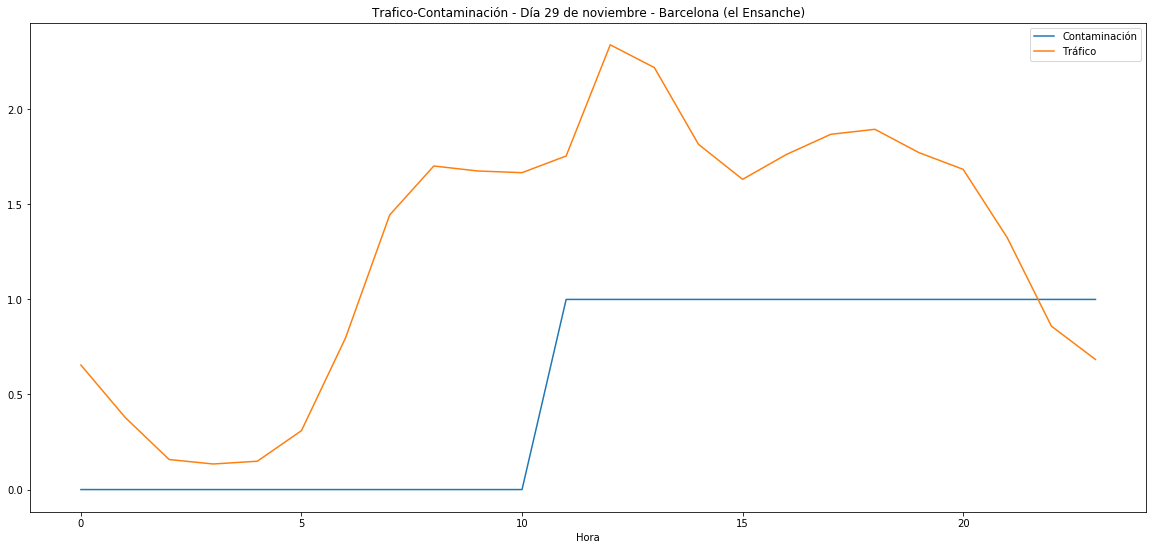

In [90]:
plt.rcParams["figure.figsize"] = (20,9)

fig = plt.figure()

dia = 29
estacion = 8019043


plt.title("Trafico-Contaminación - Día 29 de noviembre - Barcelona (el Ensanche)")

gr_qual.loc[estacion, dia].plot(label="Contaminación")
plt.plot(trafico[(trafico["idTram"].isin(tramos[tramos["NearStation"] == estacion]["Tram"])) 
        & (trafico["data"].dt.day == dia)].groupby(trafico["data"].dt.hour)["estatActual"].mean(), label="Tráfico")


plt.xlabel("Hora")
plt.ylabel("")

plt.legend()


plt.show()

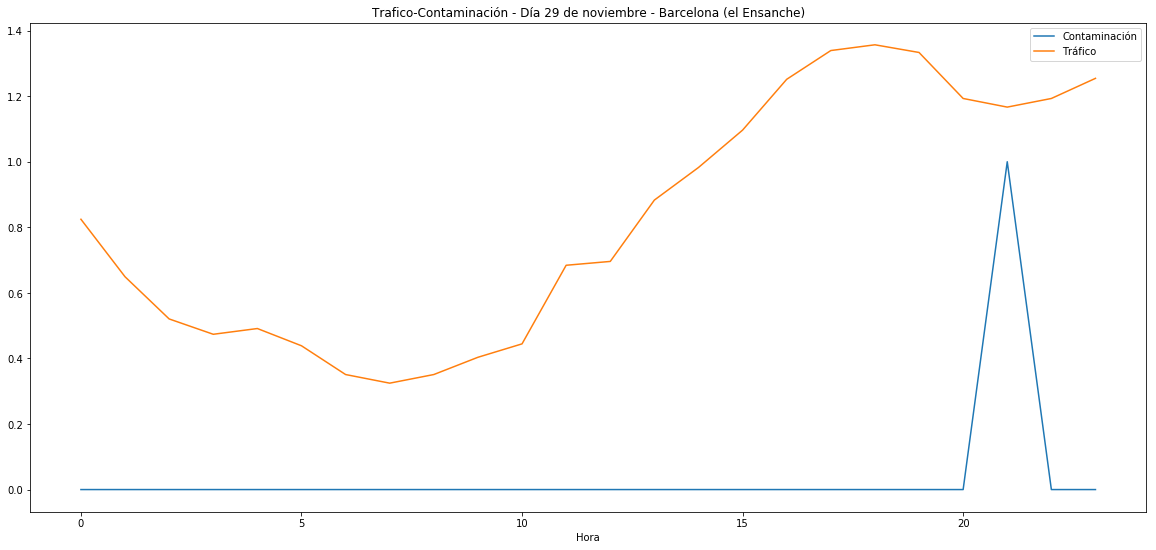

In [91]:
plt.rcParams["figure.figsize"] = (20,9)

fig = plt.figure()

dia = 4
estacion = 8019043


plt.title("Trafico-Contaminación - Día 29 de noviembre - Barcelona (el Ensanche)")

gr_qual.loc[estacion, dia].plot(label="Contaminación")
plt.plot(trafico[(trafico["idTram"].isin(tramos[tramos["NearStation"] == estacion]["Tram"])) 
        & (trafico["data"].dt.day == dia)].groupby(trafico["data"].dt.hour)["estatActual"].mean(), label="Tráfico")


plt.xlabel("Hora")
plt.ylabel("")

plt.legend()


plt.show()